In [2]:
from datasets import get_dataset_config_names

domains = get_dataset_config_names("subjqa")
domains

The repository for subjqa contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/subjqa.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [3]:
from datasets import load_dataset

subjqa = load_dataset("subjqa", name="electronics")

Generating train split:   0%|          | 0/1295 [00:00<?, ? examples/s]

/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated an

Generating test split:   0%|          | 0/358 [00:00<?, ? examples/s]

/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated an

Generating validation split:   0%|          | 0/255 [00:00<?, ? examples/s]

/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/Users/macbook/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated an

In [4]:
print(subjqa["train"]["answers"][1])

{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [7]:
import pandas as pd

dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}

for split, df in dfs.items():
    print(f"Number of question in {split}: {df['id'].nunique()}")

Number of question in train: 1295
Number of question in test: 358
Number of question in validation: 255


In [10]:
qa_cols = ["title", "question", "answers.text", "answers.answer_start", "context"]

sample_df = dfs["train"][qa_cols].sample(10, random_state=42)
sample_df

,title,question,answers.text,answers.answer_start,context
834,B005HMO6A6,How do you like the keyboard?,[],[],The good*Overall design is elegant*Quality fee...
327,B002C7481G,How is the processor?,[],[],So I have had my iPad now for about a month. T...
839,B005HMO6A6,Does this have the ability to use batteries?,[],[],-Love this product! I have tried other wirele...
1121,B009A5204K,What is the sound quality?,[],[],"One may look at me strangely, friends may call..."
976,B0075SUK14,How is the zoom?,[],[],We just returned from a trip overseas and brou...
536,B003LR7ME6,How do I get to the port?,[],[],Love this case. With the exception of the exp...
477,B003ELYQGG,How clear was the sound?,"[Although the sound is nice and neutral, sound...","[0, 13]","Although the sound is nice and neutral, the ba..."
1078,B008ABOJKS,How do you like the performance?,"[the performance is excellent, I'd like to imp...","[225, 1989]",asuswrt is by far the best firmware for this r...
889,B006W8U2MU,How did you like the performance?,[],[],This thing is so tiny it is hard to believe it...
76,B0002L5R78,What do you think about price?,[],[],"So I ordered 3, and two work perfectly fine. O..."


In [21]:
start_ids = sample_df["answers.answer_start"].iloc[6][0]
end_ids = start_ids + len(sample_df["answers.text"].iloc[6][0])
sample_df["context"].iloc[0][start_ids:end_ids]

'The good*Overall design is elegant*Qua'

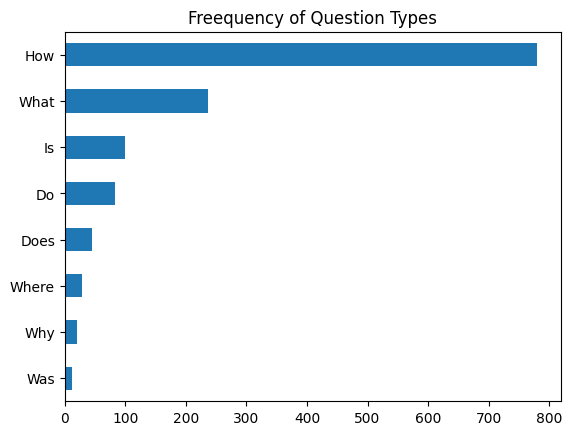

In [23]:
import matplotlib.pyplot as plt

# types of question in the training set
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

for q in question_types:
    counts[q] = dfs["train"]["question"].str.startswith(q).value_counts()[True]

pd.Series(counts).sort_values().plot.barh()
plt.title("Freequency of Question Types")
plt.show()

In [24]:
# let's see few example of common question types

for question_types in ["How", "What", "Is"]:
    for question in (
        dfs["train"][dfs["train"].question.str.startswith(question_types)].sample(n=3, random_state=42)['question']):
        print(question)

How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


### Extracting Answers from Text

#### question: Is it waterproof?
#### context: This watch is waterproof at 30m depth.
#### answer: waterproof at 30m.

### To do this, we'll need to understand:
    1. Frame the supervised learning problem
    2. Tokenize and encode text for QA task
    3. Deal with long passage that exceed a model's maximum context size

### Span Classification

In [26]:
from transformers import AutoTokenizer

model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

/Users/macbook/Downloads/jupyter_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [28]:
# extractive QA
question = "How much music can this hold?"
context = """An MP3 is about 1MB/minute, so about 6000 hours depending on file size"""

inputs = tokenizer(question, context, return_tensors="pt")
print(tokenizer.decode(inputs["input_ids"][0]))

[CLS] how much music can this hold? [SEP] an mp3 is about 1mb / minute, so about 6000 hours depending on file size [SEP]


### Initiate The Model

In [29]:
import torch
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)

with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-1.1116, -4.7025, -5.3373, -5.1322, -5.2392, -5.3954, -4.9036, -6.1132,
         -1.1116, -0.2235, -0.2033, -1.5404,  3.9553,  5.1348, -2.6161, -3.6840,
         -1.5542, -4.2347, -1.3752,  3.9511,  4.9307, -0.1758, -3.2210, -4.7404,
         -2.1590, -3.0206, -1.1116]]), end_logits=tensor([[-1.1039, -5.3862, -4.9671, -5.0835, -5.4329, -5.3375, -5.1170, -4.4589,
         -1.1040, -3.6013, -0.7225, -3.5976, -2.9277, -1.6180,  0.7128, -2.6796,
          5.0726, -0.7196, -2.9432, -3.3237,  0.5484,  5.5942, -0.1872, -4.6237,
         -2.1743,  0.8787, -1.1039]]), hidden_states=None, attentions=None)


In [30]:
start_logits = outputs.start_logits
end_logits = outputs.end_logits

In [31]:
print(f"Input IDs shape: {inputs.input_ids.size()}")
print(f"Start logits shape: {start_logits.size()}")
print(f"End logits shape: {end_logits.size()}")

Input IDs shape: torch.Size([1, 27])
Start logits shape: torch.Size([1, 27])
End logits shape: torch.Size([1, 27])


In [32]:
start_idx = torch.argmax(start_logits)
end_idx = torch.argmax(end_logits)

answer_span = inputs["input_ids"][0][start_idx:end_idx]
answer = tokenizer.decode(answer_span)

print(f"Question: {question}")
print(f"Answer: {answer}")

Question: How much music can this hold?
Answer: 1mb / minute, so about 6000


### Using Pipeline

In [34]:
from transformers import pipeline

pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
pipe(question, context, topk=3)

/Users/macbook/Downloads/jupyter_env/lib/python3.12/site-packages/transformers/pipelines/question_answering.py:326: UserWarning: topk parameter is deprecated, use top_k instead
  warnings.warn("topk parameter is deprecated, use top_k instead", UserWarning)


[{'score': 0.25079259276390076,
  'start': 16,
  'end': 47,
  'answer': '1MB/minute, so about 6000 hours'},
 {'score': 0.20448657870292664,
  'start': 37,
  'end': 47,
  'answer': '6000 hours'},
 {'score': 0.14886124432086945,
  'start': 16,
  'end': 26,
  'answer': '1MB/minute'}]

In [35]:
pipe("why is there no data", context, handle_impossible_answer=True)

{'score': 0.8422650098800659, 'start': 0, 'end': 0, 'answer': ''}

### Dealing With Long Passage

In [45]:
example = dfs["train"].iloc[0][["question", "context"]]
tokenized_example = tokenizer(
    example["question"], example["context"], return_overflowing_tokens=True, truncation=True, max_length=100, stride=25
)

In [50]:
for idx, window in enumerate(tokenized_example["input_ids"]):
    print(f"window: #{idx} has {len(window)} tokens")

window: #0 has 100 tokens
window: #1 has 88 tokens


In [51]:
for window in tokenized_example["input_ids"]:
    print(f"{tokenizer.decode(window)} \n")

[CLS] how is the bass? [SEP] i have had koss headphones in the past, pro 4aa and qz - 99. the koss portapro is portable and has great bass response. the work great with my android phone and can be " rolled up " to be carried in my motorcycle jacket or computer bag without getting crunched. they are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is [SEP] 

[CLS] how is the bass? [SEP] and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is night and day better than any ear - bud could be and are almost as good as the pro 4aa. they are " open air " headphones so you cannot match the bass to the sealed types, but it comes close. for $ 32, you cannot go wrong. [SEP] 

